In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob, os

In [ ]:
from google.colab import files
import zipfile, os

uploaded = files.upload()
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall('/content/dataset_kampus')

DATASET_PATH = '/content/dataset_kampus'
print("Folder berhasil diekstrak ke:", DATASET_PATH)
print("Isi folder:", os.listdir(DATASET_PATH))


Saving dataset_kampus.zip to dataset_kampus.zip
Folder berhasil diekstrak ke: /content/dataset_kampus
Isi folder: ['dataset']


In [ ]:
files = sorted(glob.glob(os.path.join(DATASET_PATH, 'dataset', '*.jpg')) +
               glob.glob(os.path.join(DATASET_PATH, 'dataset', '*.png')))

print(f"Jumlah gambar ditemukan: {len(files)} file")

if len(files) == 0:
    raise Exception("Tidak ada file gambar ditemukan di folder dataset!")

Jumlah gambar ditemukan: 20 file


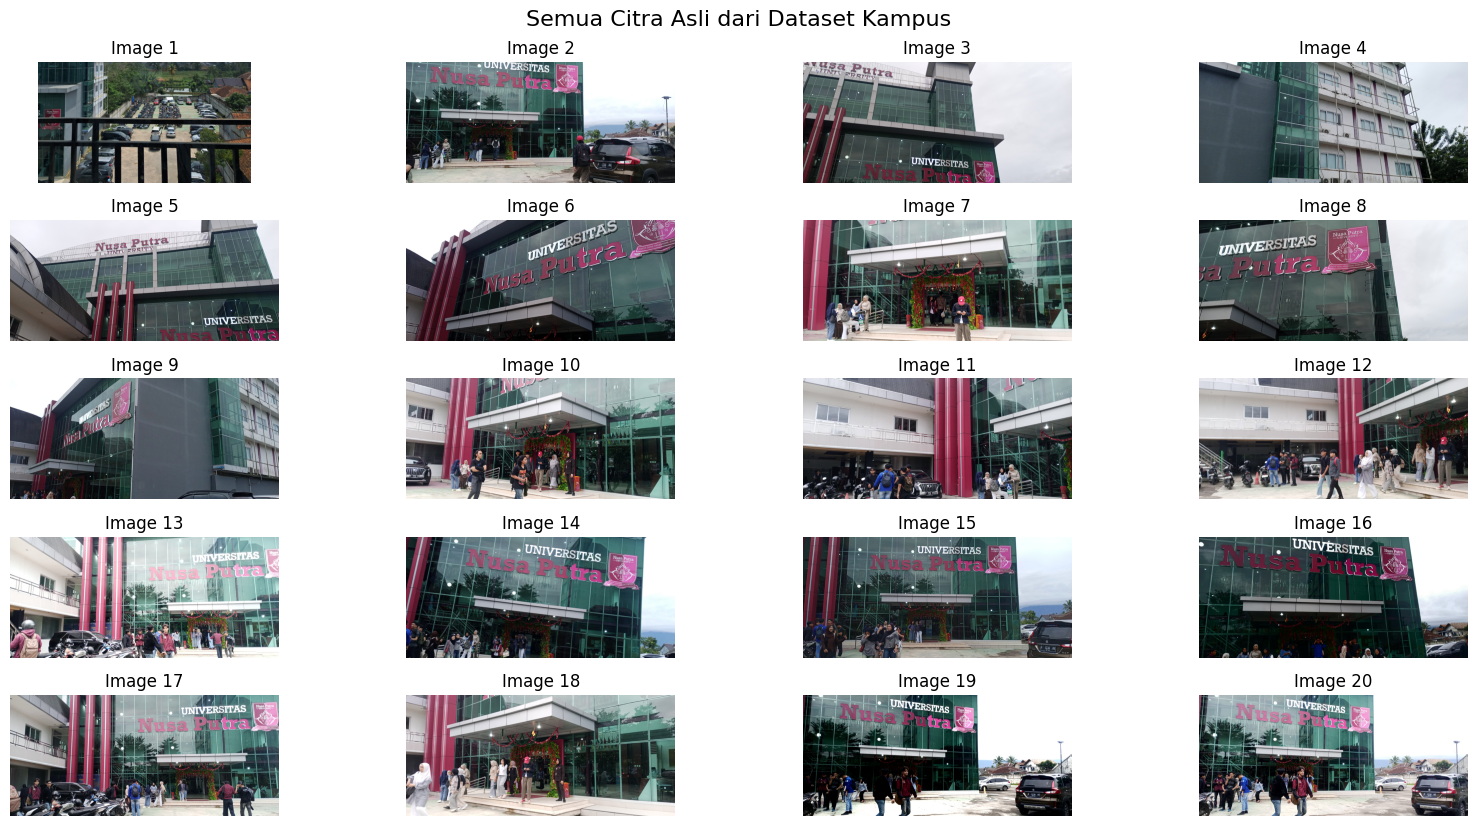

In [ ]:
cols = 4
rows = int(len(files)/cols) + 1

plt.figure(figsize=(16,10))
for i, file in enumerate(files):
    img = cv2.imread(file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.suptitle("Semua Citra Asli dari Dataset Kampus", fontsize=16)
plt.tight_layout()
plt.show()

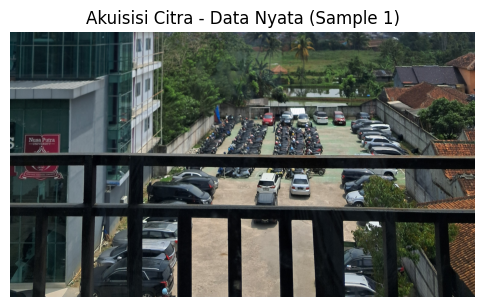

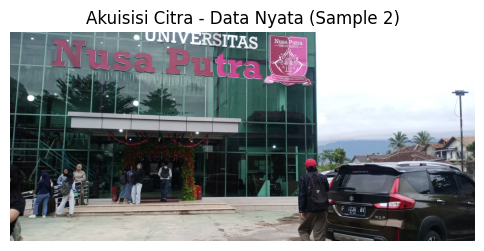

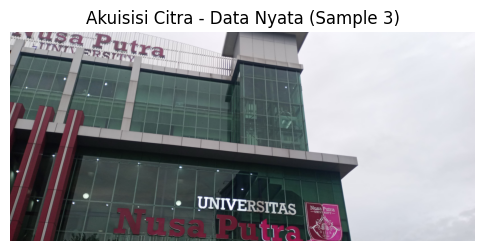

In [ ]:
num_samples = 3

for i, path in enumerate(files[:num_samples]):
    img = cv2.imread(path)

    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Akuisisi Citra - Data Nyata (Sample {i+1})")
    plt.axis("off")
    plt.show()


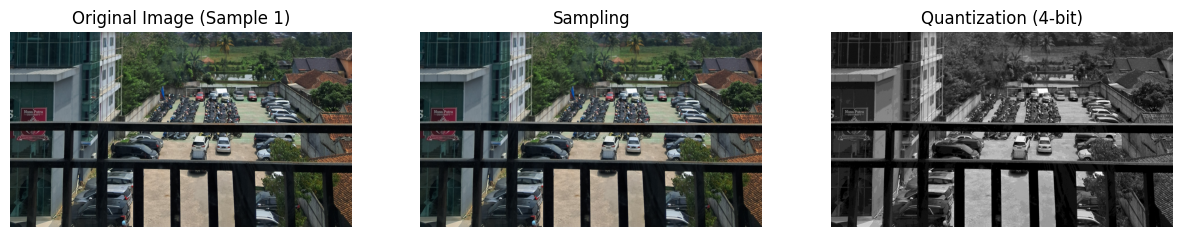

In [ ]:
num_samples = 3

for i, path in enumerate(files[:num_samples]):
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Sampling
    sampled = cv2.resize(
        rgb,
        (rgb.shape[1] // 2, rgb.shape[0] // 2),
        interpolation=cv2.INTER_AREA
    )

    # Quantization
    gray = cv2.cvtColor(sampled, cv2.COLOR_RGB2GRAY)
    quantized = (gray // 16) * 16

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(rgb)
    plt.title(f"Original Image (Sample {i+1})")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(sampled)
    plt.title("Sampling")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(quantized, cmap='gray')
    plt.title("Quantization (4-bit)")
    plt.axis("off")

    plt.show()

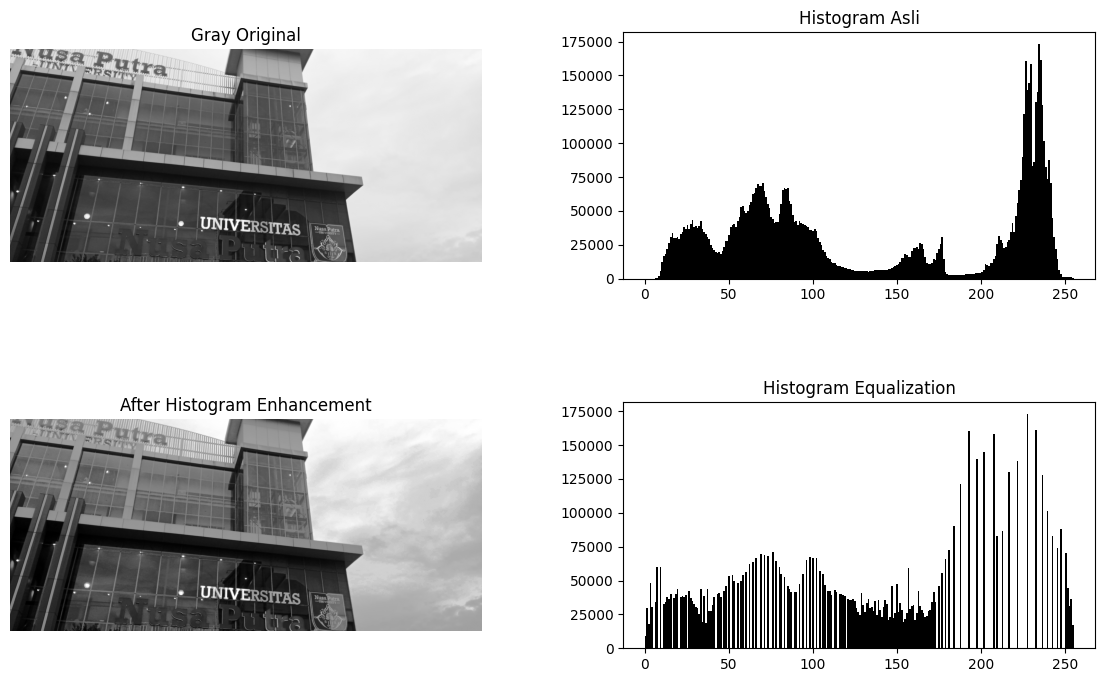

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

plt.figure(figsize=(14,8))

# Histogram
plt.subplot(2,2,2)
plt.hist(gray.flatten(), bins=256, color='black')
plt.title("Histogram Asli")

plt.subplot(2,2,4)
plt.hist(equalized.flatten(), bins=256, color='black')
plt.title("Histogram Equalization")

# Gambar
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Gray Original")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(equalized, cmap='gray')
plt.title("After Histogram Enhancement")
plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


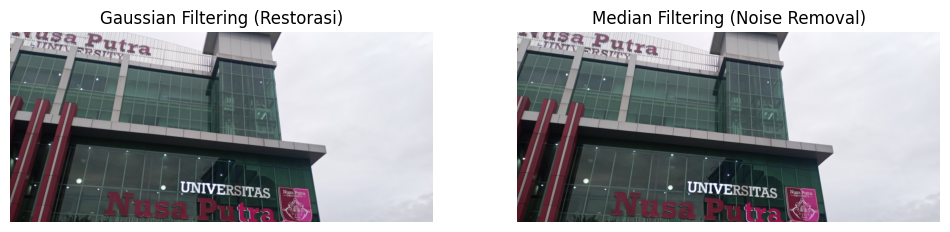

In [ ]:
blur = cv2.GaussianBlur(img, (7,7), 0)
median = cv2.medianBlur(img, 5)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filtering (Restorasi)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title("Median Filtering (Noise Removal)")
plt.axis('off')
plt.show()

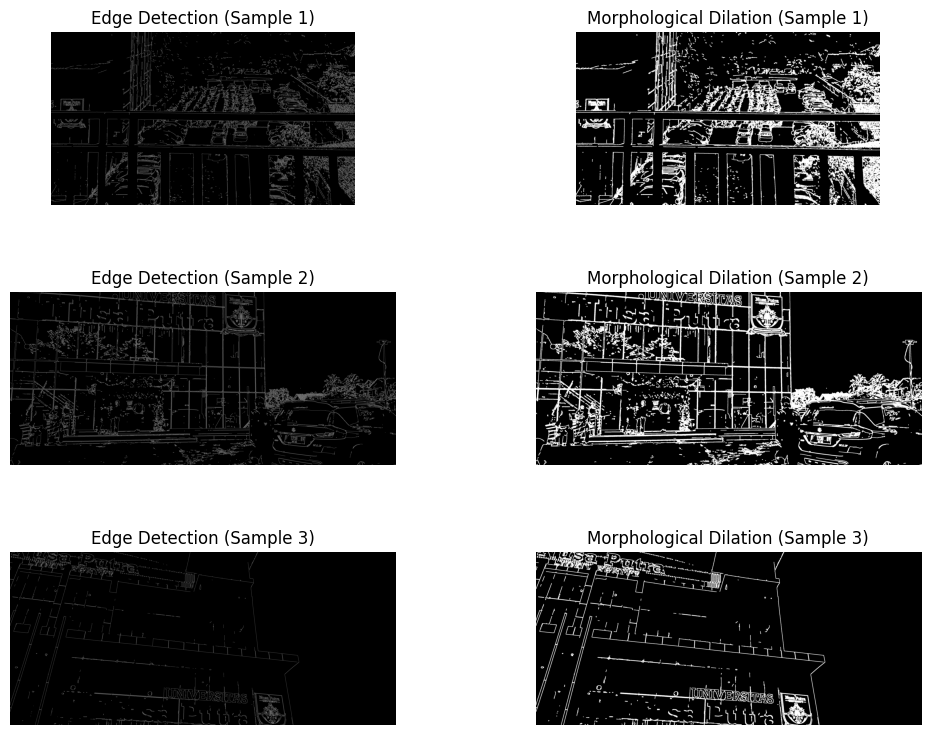

In [ ]:
num_samples = 3

plt.figure(figsize=(12, 9))

for i, path in enumerate(files[:num_samples]):
    # Load image
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Grayscale
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

    # Edge detection (Canny)
    edges = cv2.Canny(gray, 100, 200)

    # Morphology (Dilation)
    kernel = np.ones((5,5), np.uint8)
    dilation = cv2.dilate(edges, kernel, iterations=1)

    # Plot edges
    plt.subplot(num_samples, 2, i*2 + 1)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edge Detection (Sample {i+1})")
    plt.axis('off')

    # Plot dilation
    plt.subplot(num_samples, 2, i*2 + 2)
    plt.imshow(dilation, cmap='gray')
    plt.title(f"Morphological Dilation (Sample {i+1})")
    plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

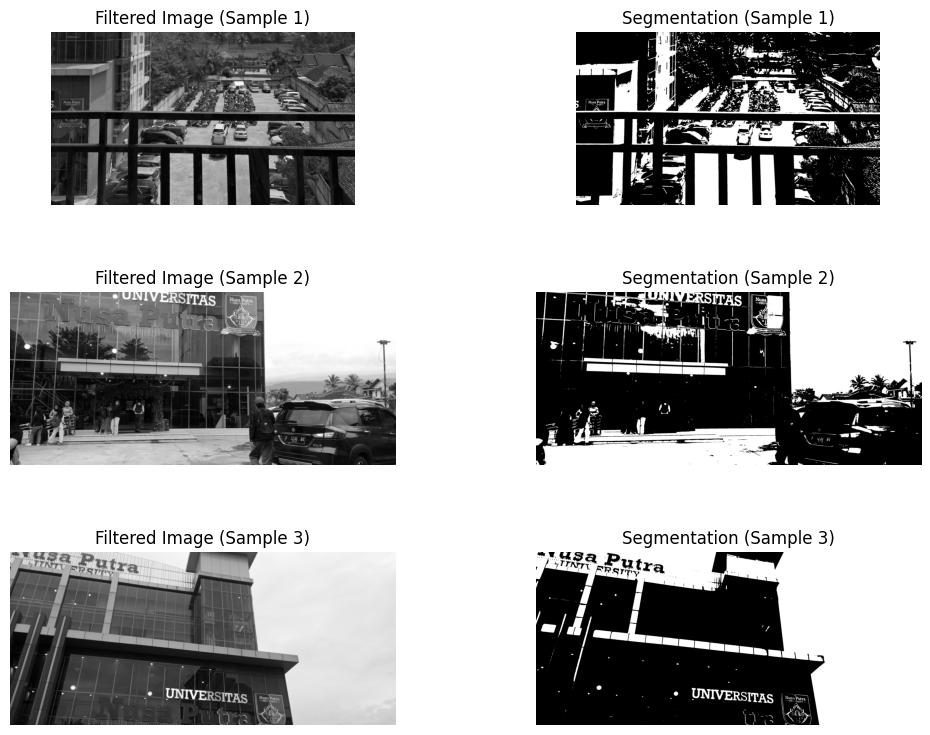

In [ ]:
num_samples = 3
plt.figure(figsize=(12, 9))

for i, path in enumerate(files[:num_samples]):
    # Load image
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Grayscale
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

    # Filtering
    filtered = cv2.GaussianBlur(gray, (5,5), 0)

    # Segmentation (Otsu Thresholding)
    _, segmented = cv2.threshold(
        filtered, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # Plot filtered image
    plt.subplot(num_samples, 2, i*2 + 1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"Filtered Image (Sample {i+1})")
    plt.axis('off')

    # Plot segmentation
    plt.subplot(num_samples, 2, i*2 + 2)
    plt.imshow(segmented, cmap='gray')
    plt.title(f"Segmentation (Sample {i+1})")
    plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()
